In [1]:
# import
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
from scipy import signal
from importlib import reload

#import winsound as sd
import pickle
import sys
import os

from Tools.tools import *
from Plasticity.plasticity import *
from Neuron.neuron import *
from Model.model_sym import *
from Analysis.analysis import *
import Operate_model

In [3]:
# Load
cd = os.getcwd()
path = os.path.dirname(cd)
    
with open(path+'//Data_final.pkl', 'rb') as file:
    # Filtered by proper length
    Filt_idata = pickle.load(file) # patterns in input layer
    Filt_gdata = pickle.load(file) # patterns of granule cells
    Filt_glen = pickle.load(file) # lengths of each patterns of granule cells
    F_DataLen = pickle.load(file) # the number of data
    
    # Index of CA3 patterns
    Af_py = pickle.load(file) # Pyramidal neurons
    Af_in = pickle.load(file) # Inhibitory neurons
    
    # 
    In_py_list = pickle.load(file)
    In_in_list = pickle.load(file)

In [5]:
class config:
    def __init__(self, pc):
        # The number of neurons
        self.N_I = 16
        self.N_O = self.N_I

        self.N_DG = 800
        self.N_DGH = self.N_I
        self.N_DGM = 100 
        self.N_DGB = 400 

        self.N_CA3 = pc[3] 
        self.N_CA1 = 200
        self.N_CA3i = pc[4] 
        
        # Weights of each connection
        # From EC
        self.w_EI = 3
        self.w_ppDG = 2 
        self.w_ppCA3 = 1 
        self.w_ppCA1 = 0.5 

        # DG
        self.w_IH = 3 
        self.w_IB = 4 
        self.w_IM = 3 
        self.w_HM = 4 
        self.w_MB = 4 
        self.w_BDG = 3 

        # CA3
        self.w_mf = 2 
        self.w_mfi = 2 
        self.w_Rc = 1

        self.w_CA33i = 1
        self.w_3iCA3 = 2 
        self.w_3i3i = 0.5 
        self.w_NoCA3 = 0.5

        # CA1
        self.w_Sc = 0.15
        self.w_CA1O = 2 

        # The number of connections 
        # From EC
        self.c_ppDG = 1
        self.c_ppCA3 = 8
        self.c_ppCA1 = 3

        # DG
        self.c_IH = 1
        self.c_IB = self.N_I
        self.c_IM = self.N_I*2//3
        self.c_HM = 1
        self.c_MB = self.N_I
        self.c_BDG = 1

        # CA3
        self.c_mf = pc[0]
        self.c_mfi = pc[1]
        self.c_Rc = self.N_CA3//4

        self.c_CA33i = self.N_CA3i//4
        self.c_3iCA3 = pc[2]
        self.c_3i3i = pc[5]
        self.c_NoCA3 = self.N_CA3
        self.c_Sc =  self.N_CA3//2

        # Parameters for delay
        self.d_I = 10
        self.d_O = 15
        self.d_DG = 3
        self.d_CA3 = 5
        self.d_CA3i = 1

In [6]:
# init
pc = [30,3,600,2400,120,20]
already_learned = False
learned_weights = [0,0,0,0]
params = config(pc)

In [15]:
# Neuron indices want to see the specific values
WTS_I = []
WTS_DGH = []
WTS_DGM = []
WTS_DGB = []
WTS_DG = []
WTS_CA3 = []
WTS_CA3i = []
WTS_CA1 = []
WTS = [WTS_I, WTS_DGH, WTS_DGM, WTS_DGB, WTS_DG, WTS_CA3, WTS_CA3i, WTS_CA1]

In [16]:
# Tradeoff 조사
with open('Cue_Sim.pkl', 'rb') as file:
    Cue_Data = pickle.load(file)
# Bias 조사
with open('Learned weights-sim_DG.pkl', 'rb') as file:
    q_ppCA3 = pickle.load(file)
    q_Rc = pickle.load(file)
    q_CA33i = pickle.load(file)
    q_Sc = pickle.load(file)

    DG_E_list = pickle.load(file)

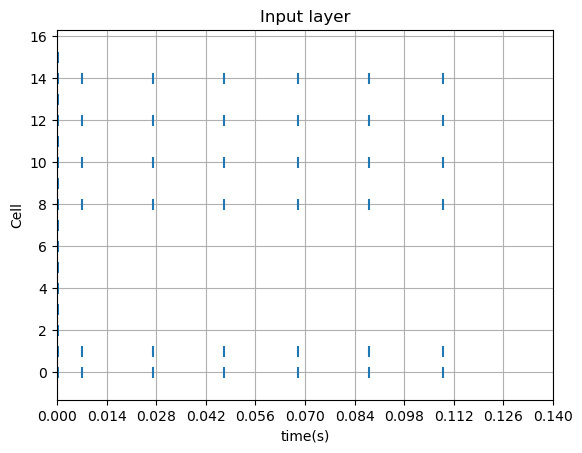

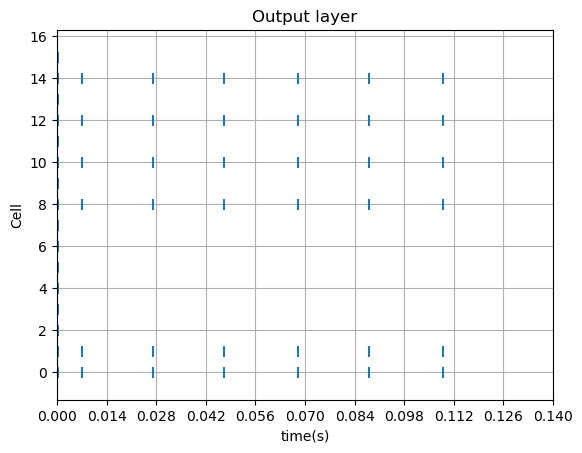

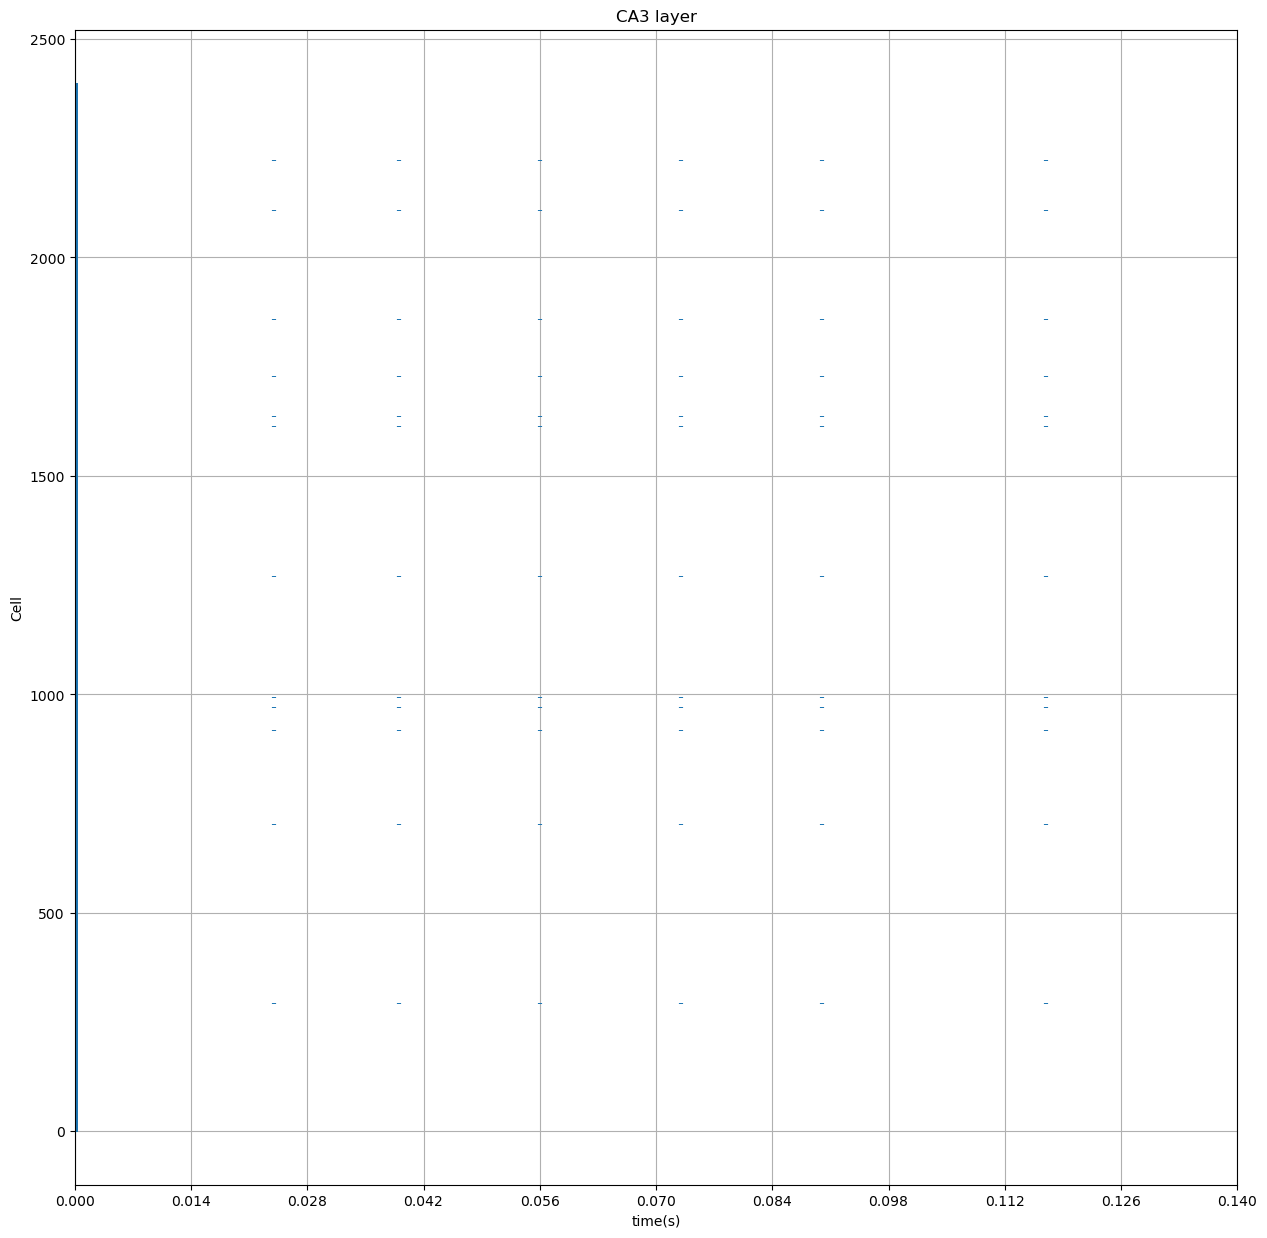

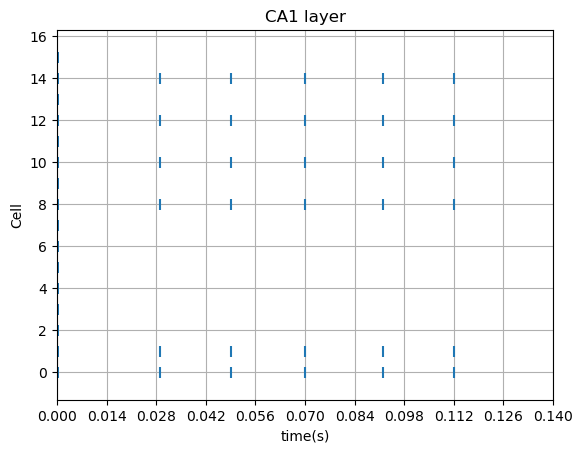

Ret1 :  {993, 1857, 1635, 292, 1605, 971, 2221, 1614, 1727, 918, 1270, 2108, 703}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
---------------------------------------------------------------------------------


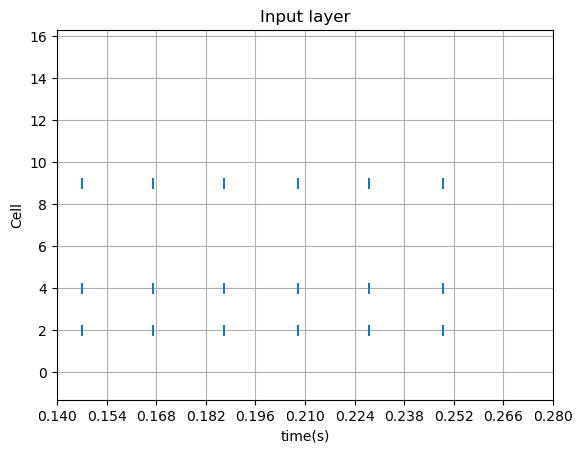

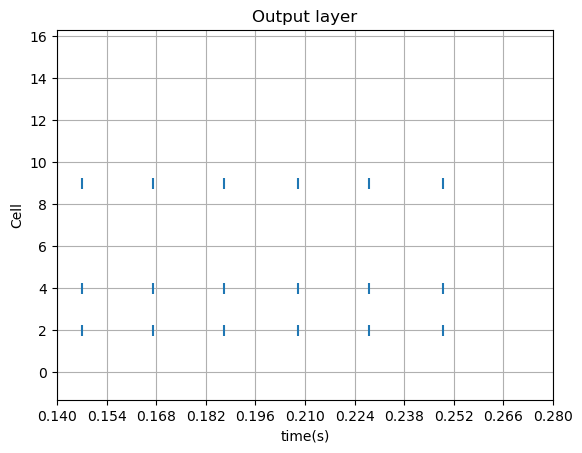

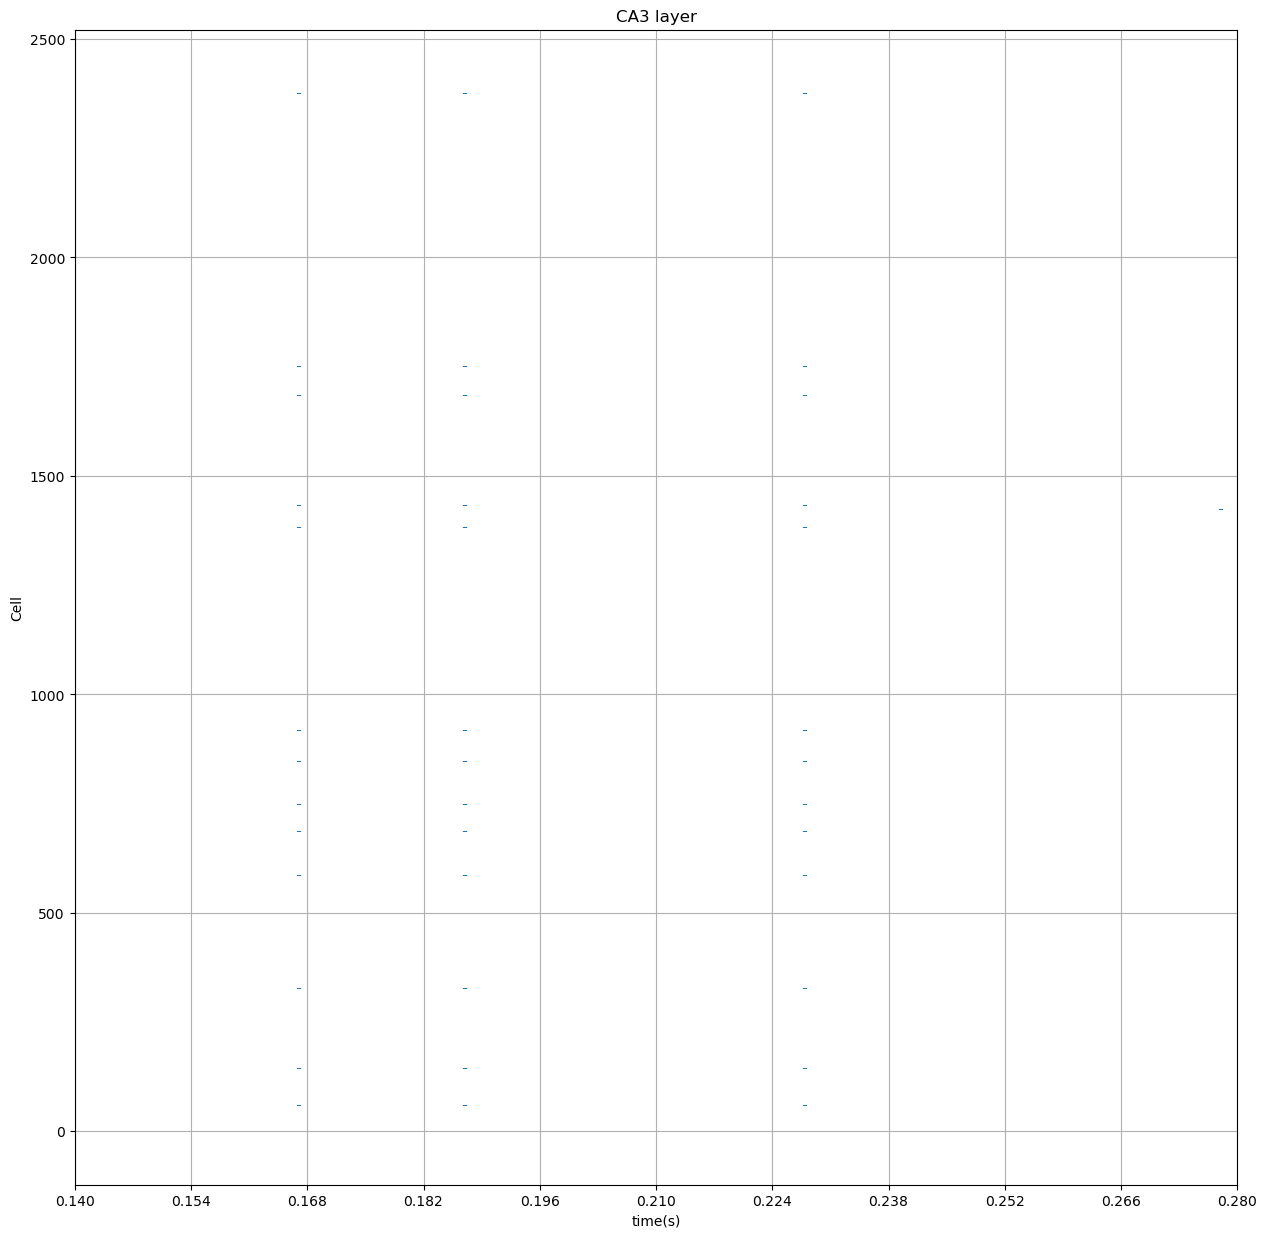

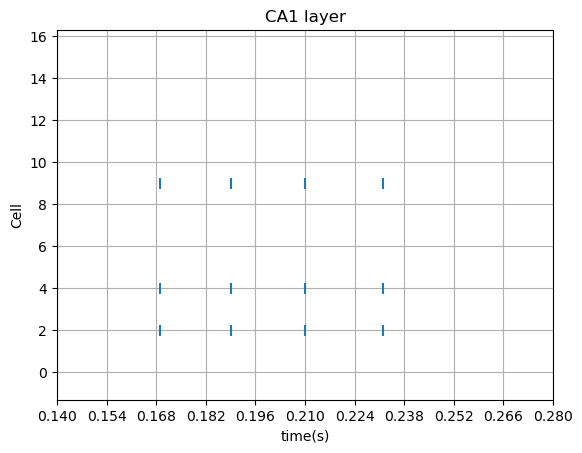

Ret1 :  {1381, 326, 2376, 585, 748, 686, 143, 846, 1358, 1424, 917, 1685, 1750, 1432, 59, 509}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
---------------------------------------------------------------------------------
Success :  0
Fail :  0
If_fail :  0


In [17]:
# Learning
for Tar in range(1):
    # initiation
    En_win = 120
    Re_win = 120
    
    Num_tar = 2
    Num_cue = 1
    Repeat = 1
    
    EtoI_learning = True
    already_learned = False
    learned_weights = [0,0,0,0]
    Direct_pp = True
    
    Target = Filt_idata[:,144]
    Target = np.append(Target, Cue_Data[:,Tar])
    Target = np.reshape(Target, (2,16)).T
    
    Cue = np.zeros(params.N_I)
    Cue_CA3 = list(np.where(DG_E_list[Tar])[0])

    network, Fail, If_fail, Success, Winfin, Voltage, FT, CA3_R_list, Out_R_list = Operate_model.run_model(
        En_win, Re_win, 
        only_DG, only_CA3, 
        Num_tar, Num_cue, Repeat, Target, Cue, 
        WTS, params, 
        already_learned, learned_weights, Direct_pp,
        Filt_idata, Af_py, Af_in)
    
#     if not already_learned:
#         with open('Learned weights-sim%d.pkl' % (Tar), 'wb') as file:
#             pickle.dump(network.q_ppCA3, file)
#             pickle.dump(network.q_Rc, file)
#             pickle.dump(network.q_CA33i, file)
#             pickle.dump(network.q_Sc, file)

In [ ]:
for Tar in range(25):  
    # initiation
    En_win = 120
    Re_win = 120

    # 현 trial에서 cue의 개수
    Num_tar = 2
    Num_cue = 1
    Repeat = 30
    
    Phase_num = Repeat

    # target : 2x25 / P_Data : 16x25
    Target = Filt_idata[:,144]
    Target = np.append(Target, Cue_Data[:,Tar])
    Target = np.reshape(Target, (16,2))
    
    Cue = Cue_Data[:,Tar]
    Cue_CA3 = list(np.where(DG_E_list[Tar])[0])

    EtoI_learning = True
    already_learned = True
    Direct_pp = True
    
    if already_learned:
        with open('Learned weights-sim%d.pkl' % (Tar), 'rb') as file:
            q_ppCA3 = pickle.load(file)   
            q_Rc = pickle.load(file)
            q_CA33i = pickle.load(file)
            q_Sc = pickle.load(file)

        for n in range(params.N_CA3):
            for m in range(params.N_CA3i):
                if q_CA33i[n,m] == 0.75:
                    q_CA33i[n,m] = 0.5
                if q_CA33i[n,m] == 3:
                    q_CA33i[n,m] = 3
        for n in range(params.N_CA3):
            for m in range(params.N_I):
                if q_Sc[n,m] < 1.5:
                    q_Sc[n,m] = 2*q_Sc[n,m]
                elif 1.5 <= q_Sc[n,m]:
                    q_Sc[n,m] = 3

        if not EtoI_learning:
            for n in range(params.N_CA3):
                for m in range(params.N_CA3i):
                    if q_CA33i[n,m] !=0:
                        q_CA33i[n,m] = 0.4
        learned_weights = [q_ppCA3, q_Rc, q_CA33i, q_Sc]
    else:
        learned_weights = [0,0,0,0]

    network, Fail, If_fail, Success, Winfin, Voltage, FT, CA3_R_list, Out_R_list = Operate_model.run_model(
        En_win, Re_win, 
        only_DG, only_CA3, 
        Num_tar, Num_cue, Repeat, Target, Cue, 
        WTS, params, 
        already_learned, learned_weights, Direct_pp,
        Filt_idata, Af_py, Af_in)
    
    with open('Results-sim%d.pkl' % (Tar), 'wb') as file:
        pickle.dump(CA3_R_list, file)
        pickle.dump(CA1_R_list, file)